<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/gis-programming-project-asquare/blob/chicago_data/Chicago_AQ_Project_Eclipse_data_on_the_Planetary_Computer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chicago AQ - Project Eclipse data on the Planetary Computer


*   https://www.microsoft.com/en-us/research/project/project-eclipse/
*   https://planetarycomputer.microsoft.com/dataset/eclipse#Example-Notebook
*   https://planetarycomputer.microsoft.com/dataset/eclipse


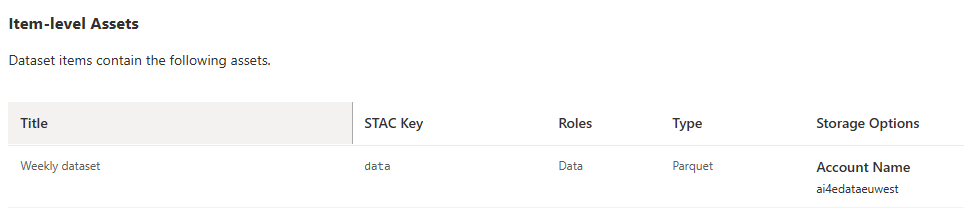








column names in the Project Eclipse dataset:

*  City: Indicates the city where the Microsoft Eclipse device is deployed.
*  DeviceId: A unique identifier for each sensor device.
*  LocationName: A string that describes the specific location of the device.
*  Latitude: The geographic latitude of the device location.
*  Longitude: The geographic longitude of the device location.
*  ReadingDateTimeUTC: The timestamp (UTC format) when the sensor reading was recorded.
*  PM25: The uncalibrated fine particulate matter (PM 2.5) concentration measured in µg/m³.
*  CalibratedPM25: The calibrated PM 2.5 concentration in µg/m³.
*  CalibratedO3: The calibrated ozone concentration in parts per billion (PPB).
*  CalibratedNO2: The calibrated nitrogen dioxide concentration in PPB.
*  CO: The uncalibrated carbon monoxide concentration measured in parts per million (PPM).
*  Temperature: The ambient temperature recorded in degrees Celsius.
*  Humidity: The relative humidity recorded as a percentage.
*  BatteryLevel: The battery voltage level of the device.
*  PercentBattery: The remaining battery percentage of the device.
*  CellSignal: The cellular signal strength of the device, measured in decibels (dB).

##perparations

In [1]:

# Install necessary libraries (if not already installed)
!pip install pystac-client planetary-computer adlfs dask geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.3/213.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.0/429.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.3/191.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.2 MB/s eta 0:00:00


In [2]:
# Import libraries
import pystac_client
import planetary_computer
import pandas as pd
import geopandas as gpd
import dask.dataframe as dd
import adlfs

## Reading the data

In [3]:
# Step 1: Access the STAC API and retrieve the Eclipse collection
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace
)


In [4]:
# Retrieve the Eclipse dataset
eclipse = catalog.get_collection("eclipse")
asset = planetary_computer.sign(eclipse.assets["data"])

In [5]:
# Step 2: Connect to Azure Blob Storage and get the list of Parquet files
fs = adlfs.AzureBlobFileSystem(**asset.extra_fields["table:storage_options"])
files = [f"az://{x}" for x in fs.ls(asset.href)]

In [6]:
# Step 3: Load all data using Dask
ddf = dd.read_parquet(files, storage_options=asset.extra_fields["table:storage_options"])

In [7]:
# Step 4: Convert to Pandas for analysis (if needed)
df = ddf.compute()

In [8]:
# Display the first few rows
df.head()

,City,DeviceId,LocationName,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,Temperature,Humidity,BatteryLevel,PercentBattery,CellSignal
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:03:00,5.561094,NaN,NaN,NaN,0.123580,27.383499,55.128479,4.237187,93.964844,-76.0
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:08:10,6.633914,NaN,NaN,NaN,0.132103,27.079086,55.059814,4.236094,93.964844,-81.0
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:13:20,4.068707,NaN,NaN,NaN,0.131126,27.079086,55.035400,4.236406,93.964844,-80.0
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:18:30,6.351702,NaN,NaN,NaN,0.138784,26.945572,54.632568,4.236094,93.863281,-82.0
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:23:40,9.574065,NaN,NaN,NaN,0.413070,26.828079,53.907776,4.235938,93.863281,-81.0


In [9]:


# Creating a dictionary to store metadata
metadata = {
    "First Date": df["ReadingDateTimeUTC"].min(),
    "Last Date": df["ReadingDateTimeUTC"].max(),
    "Total Entries": df.shape[0],
    "Unique Cities": df["City"].nunique(),
    "Unique Devices": df["DeviceId"].nunique(),
    "Unique Locations": df["LocationName"].nunique(),
    "Latitude Range": (df["Latitude"].min(), df["Latitude"].max()),
    "Longitude Range": (df["Longitude"].min(), df["Longitude"].max()),
    "PM25 Stats": df["PM25"].describe(),
    "Temperature Stats": df["Temperature"].describe(),
    "Humidity Stats": df["Humidity"].describe(),
    "BatteryLevel Stats": df["BatteryLevel"].describe(),
    "CellSignal Stats": df["CellSignal"].describe()
}

# Displaying metadata
metadata


{'First Date': Timestamp('2021-06-20 00:00:30'),
 'Last Date': Timestamp('2023-03-04 23:59:59'),
 'Total Entries': 16320944,
 'Unique Cities': 1,
 'Unique Devices': 137,
 'Unique Locations': 128,
 'Latitude Range': (41.6463031593152, 47.642025),
 'Longitude Range': (-122.144371, -87.52829283),
 'PM25 Stats': count    1.632070e+07
 mean     1.228155e+01
 std      1.086111e+02
 min      0.000000e+00
 25%      3.249372e+00
 50%      5.902815e+00
 75%      1.033289e+01
 max      2.026965e+04
 Name: PM25, dtype: float64,
 'Temperature Stats': count    1.632094e+07
 mean     1.379010e+01
 std      1.231563e+01
 min     -2.328789e+01
 25%      3.735428e+00
 50%      1.373833e+01
 75%      2.334602e+01
 max      5.187271e+01
 Name: Temperature, dtype: float64,
 'Humidity Stats': count    1.632094e+07
 mean     6.304879e+01
 std      1.625577e+01
 min      0.000000e+00
 25%      5.137329e+01
 50%      6.466980e+01
 75%      7.593689e+01
 max      9.832153e+01
 Name: Humidity, dtype: float64,
 '

###Downloading the files

In [10]:
import pandas as pd
import os
from google.colab import files
'''
# Define file name
file_name = "chicago_eclipse_data.csv"

# Save the entire dataset as a single CSV file
df.to_csv(file_name, index=False)

# Download the file directly from Google Colab
files.download(file_name)
'''

'\n# Define file name\nfile_name = "chicago_eclipse_data.csv"\n\n# Save the entire dataset as a single CSV file\ndf.to_csv(file_name, index=False)\n\n# Download the file directly from Google Colab\nfiles.download(file_name)\n'

In [12]:

import os
import pandas as pd
from google.colab import files

# Define the maximum file size (20 MB)
max_file_size = 20 * 1024 * 1024  # 20 MB

# Create a directory for the CSV files
output_dir = "chicago_eclipse_data"
os.makedirs(output_dir, exist_ok=True)

# Calculate chunk size based on memory usage
estimated_file_size = df.memory_usage(index=True, deep=True).sum()
num_chunks = max(1, estimated_file_size // max_file_size + 1)
chunk_size = len(df) // num_chunks

# Split the dataset into smaller chunks
chunks = [df.iloc[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# Save and download each chunk
csv_files = []
for i, chunk in enumerate(chunks):
    file_name = f"chicago_eclipse_data_part_{i+1}.csv"
    file_path = os.path.join(output_dir, file_name)

    # Save as CSV
    chunk.to_csv(file_path, index=False)
    csv_files.append(file_path)

    # Download the file directly in Google Colab
    files.download(file_path)

# List of saved files
csv_files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['chicago_eclipse_data/chicago_eclipse_data_part_1.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_2.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_3.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_4.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_5.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_6.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_7.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_8.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_9.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_10.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_11.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_12.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_13.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_14.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_15.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_16.csv',
 'chicago_eclipse_data/chicago_eclipse_data_part_17.csv',
 'chicago_eclipse_data/